In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv("C:/Users/hp cc129/Desktop/Work/ML LAB/pro/data/train.csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train.shape

(614, 13)

In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())

In [9]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].median())

In [10]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df_train.dropna(inplace=True)

In [12]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df_train.shape

(542, 13)

In [14]:
print(pd.crosstab(df_train['Gender'],df_train['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


<AxesSubplot:xlabel='Gender', ylabel='count'>

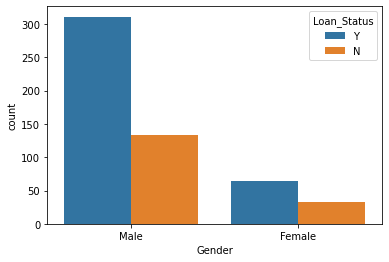

In [15]:
sns.countplot(df_train['Gender'],hue=df_train['Loan_Status'])

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


<AxesSubplot:xlabel='Married', ylabel='count'>

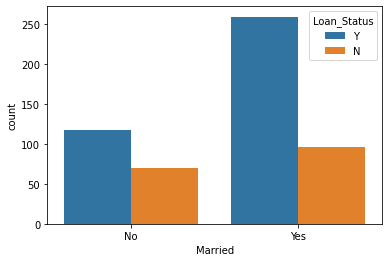

In [16]:
print(pd.crosstab(df_train['Married'],df_train['Loan_Status']))
sns.countplot(df_train['Married'],hue=df_train['Loan_Status'])

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

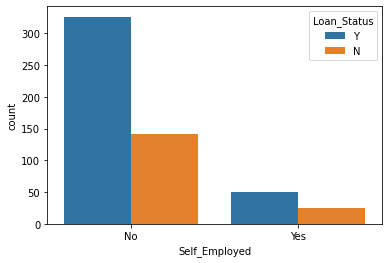

In [17]:
print(pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status']))
sns.countplot(df_train['Self_Employed'],hue=df_train['Loan_Status'])

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

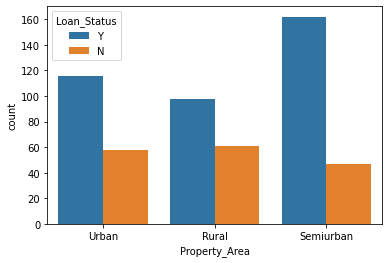

In [18]:
print(pd.crosstab(df_train['Property_Area'],df_train['Loan_Status']))
sns.countplot(df_train['Property_Area'],hue=df_train['Loan_Status'])

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

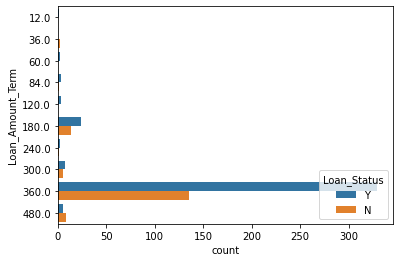

In [19]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=df_train)

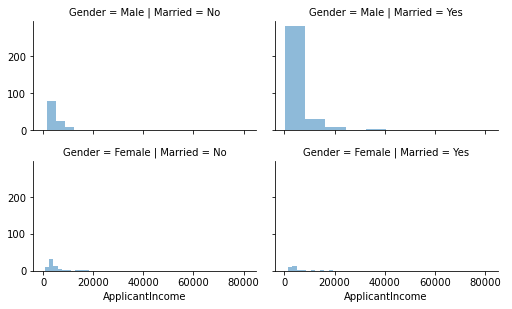

In [20]:
grid=sns.FacetGrid(df_train,row='Gender',col='Married',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

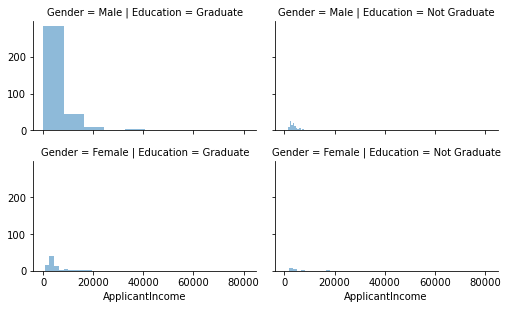

In [21]:
grid=sns.FacetGrid(df_train,row='Gender',col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

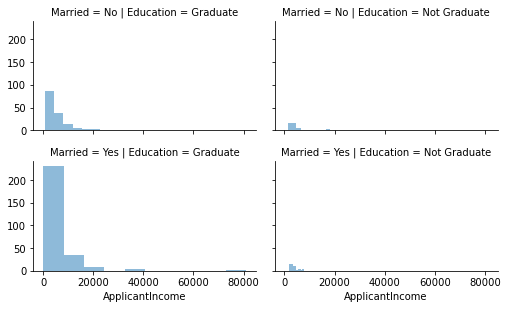

In [22]:
grid=sns.FacetGrid(df_train,row='Married',col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

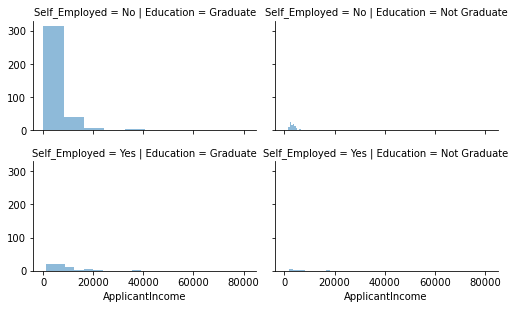

In [23]:
grid=sns.FacetGrid(df_train,row='Self_Employed',col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

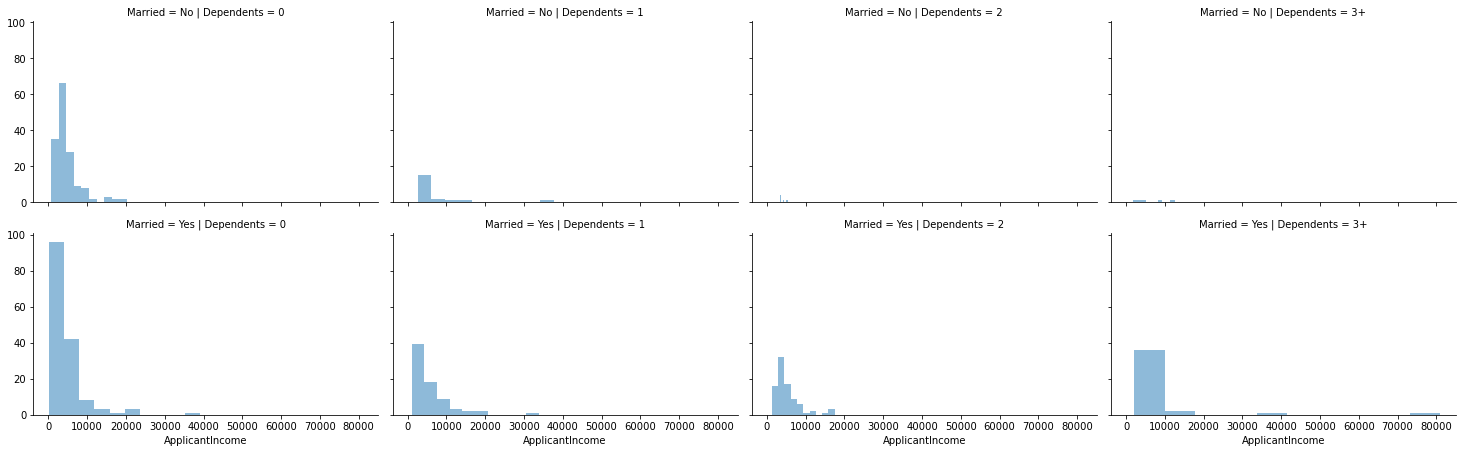

In [24]:
grid=sns.FacetGrid(df_train,row='Married',col='Dependents',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

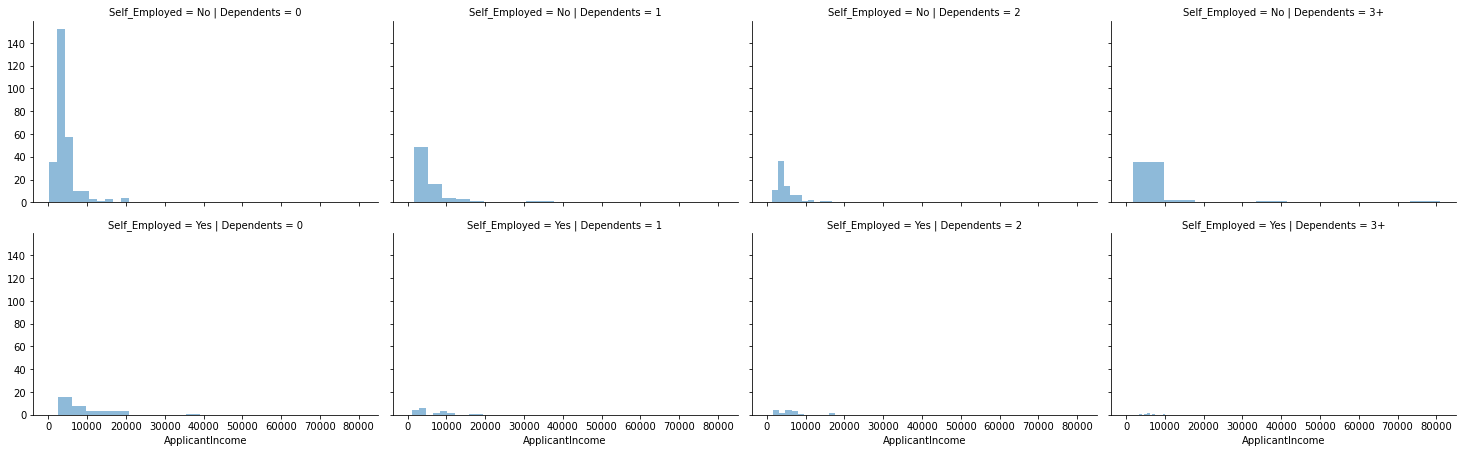

In [25]:
grid=sns.FacetGrid(df_train,row='Self_Employed',col='Dependents',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

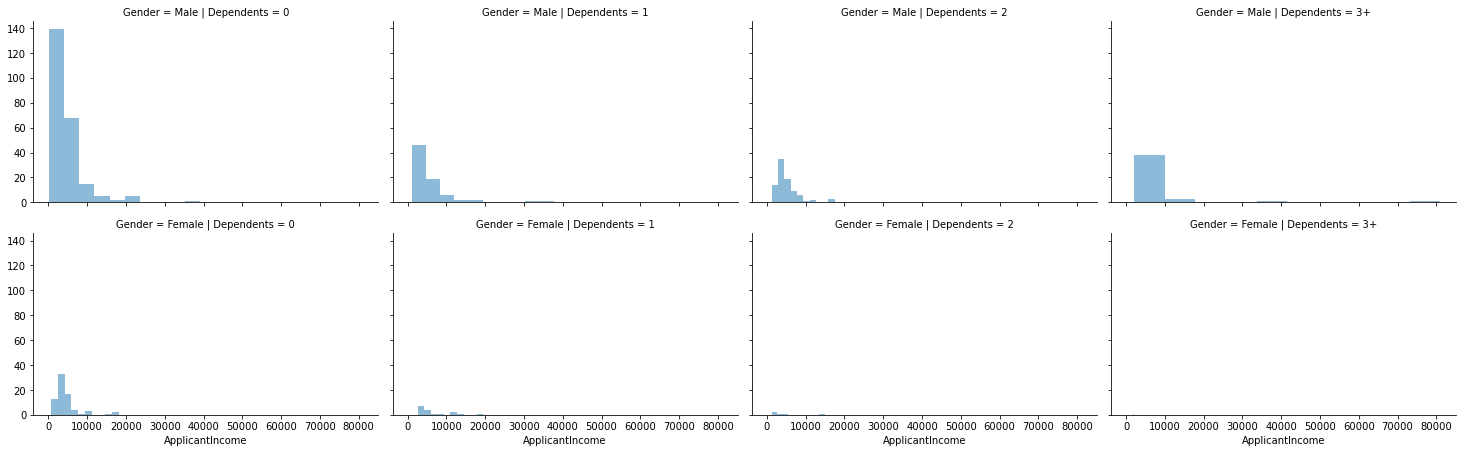

In [26]:
grid=sns.FacetGrid(df_train,row='Gender',col='Dependents',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

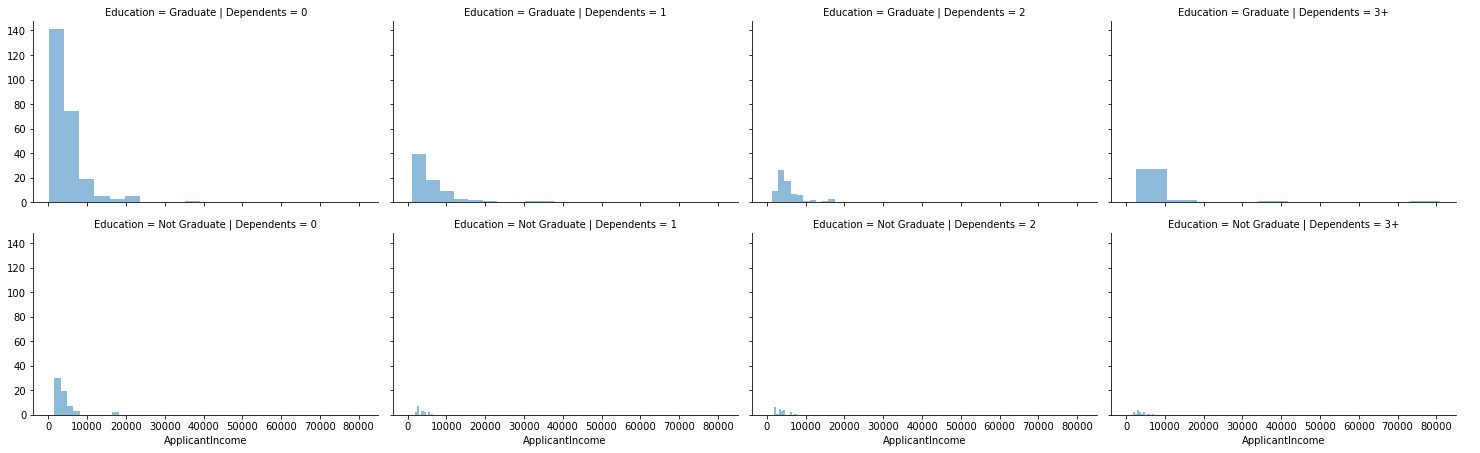

In [27]:
grid=sns.FacetGrid(df_train,row='Education',col='Dependents',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

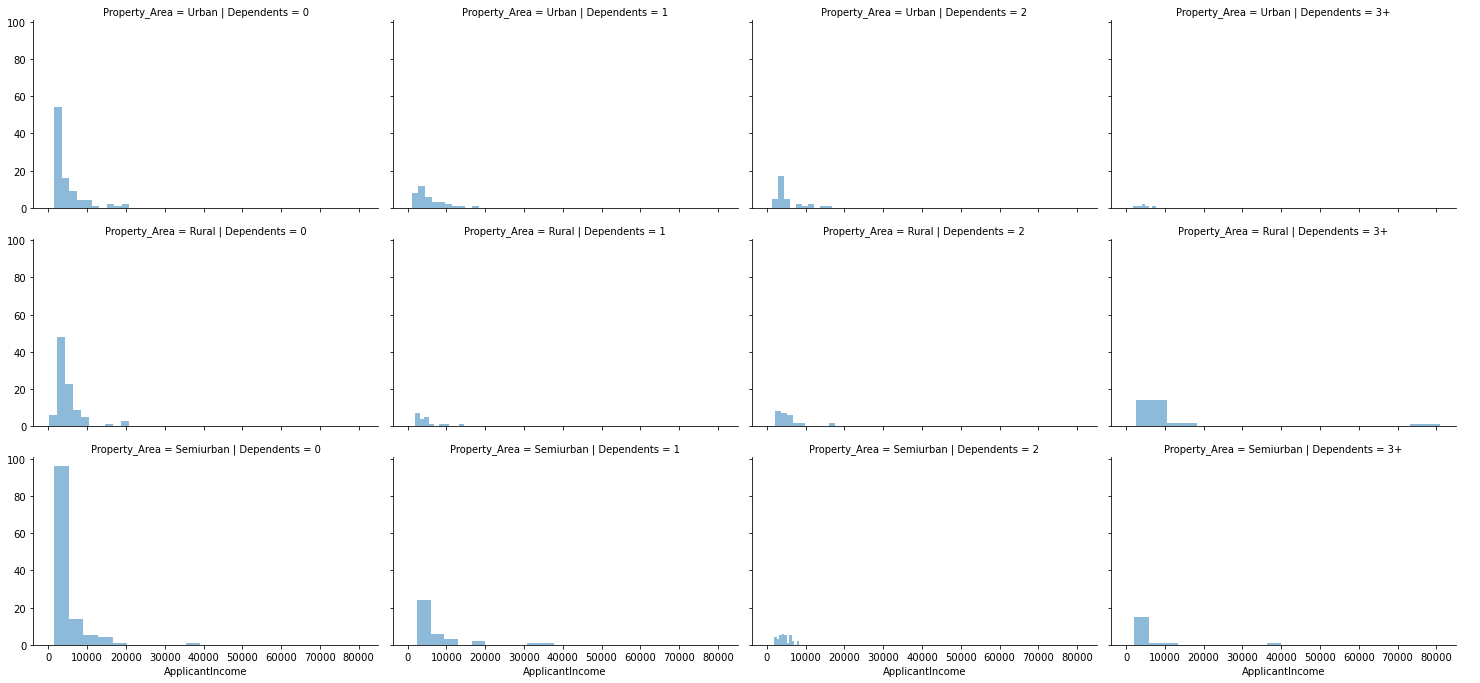

In [28]:
grid=sns.FacetGrid(df_train,row='Property_Area',col='Dependents',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

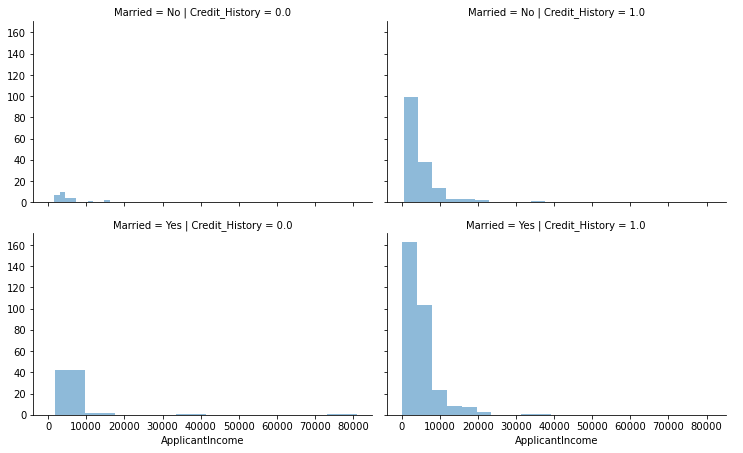

In [29]:
grid=sns.FacetGrid(df_train,row='Married',col='Credit_History',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

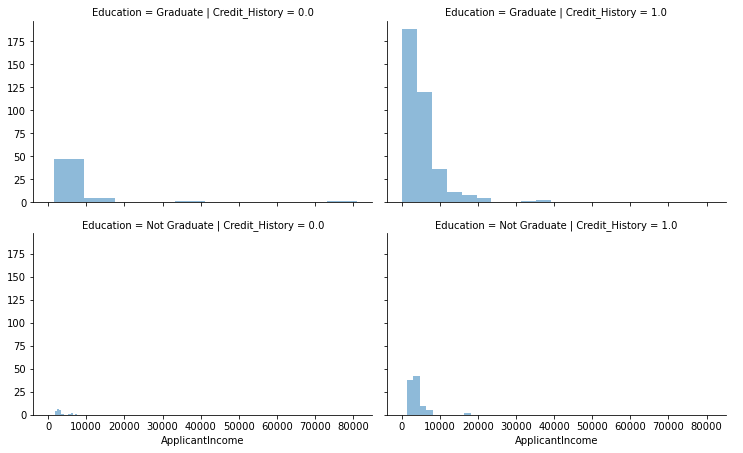

In [30]:
grid=sns.FacetGrid(df_train,row='Education',col='Credit_History',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

In [31]:
df_train['Loan_Status'].replace('Y',1,inplace = True)
df_train['Loan_Status'].replace('N',0,inplace = True)

In [32]:
df_train['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [33]:
df_train.Gender=df_train.Gender.map({'Male':1,'Female':0})
df_train['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [34]:
df_train.Married=df_train.Married.map({'Yes':1,'No':0})
df_train['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [35]:
df_train.Dependents=df_train.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df_train['Dependents'].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [36]:
df_train.Education=df_train.Education.map({'Graduate':1,'Not Graduate':0})
df_train['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [37]:
df_train.Self_Employed=df_train.Self_Employed.map({'Yes':1,'No':0})
df_train['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [38]:
df_train.Property_Area=df_train.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df_train['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [39]:
df_train['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
53.000000      1
65.000000      1
109.000000     1
156.000000     1
89.000000      1
Name: LoanAmount, Length: 195, dtype: int64

In [40]:
df_train['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [41]:
df_train['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

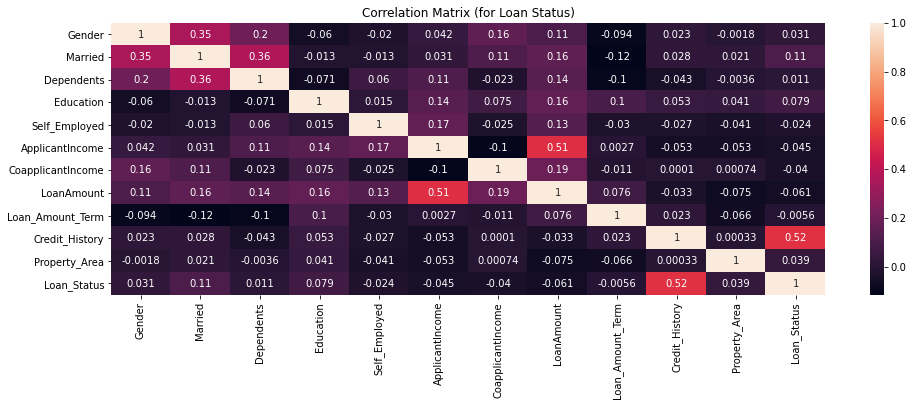

In [42]:
plt.figure(figsize=(16,5))
sns.heatmap(df_train.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [43]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [44]:
X = df_train.iloc[:,1:-1].values
y = df_train.iloc[:,-1].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
print(X_train)

[[ 0.4687412   0.72803526  1.20165033 ...  0.27580043  0.41646337
  -1.32153574]
 [ 0.4687412   0.72803526  1.20165033 ...  0.27580043 -2.40117159
   1.21043318]
 [-2.1333734   0.72803526  0.21992468 ...  0.27580043  0.41646337
  -0.05555128]
 ...
 [ 0.4687412   0.72803526  0.21992468 ...  0.27580043  0.41646337
  -0.05555128]
 [ 0.4687412   0.72803526  0.21992468 ... -0.65718072 -2.40117159
  -0.05555128]
 [ 0.4687412   0.72803526 -0.76180097 ...  0.27580043  0.41646337
  -0.05555128]]


# Artificial Neural Network

In [48]:
import keras
ann = keras.models.Sequential()

Using TensorFlow backend.


In [49]:
ann.add(keras.layers.Dense(units=6, activation='relu'))

In [50]:
ann.add(keras.layers.Dense(units=6, activation='relu'))

In [51]:
ann.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [52]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
ann.fit(X_train, y_train, batch_size =32, epochs =100)

Epoch 1/100
433/433 [==============================] - 0s 352us/step - loss: 0.7205 - accuracy: 0.5035
Epoch 2/100
433/433 [==============================] - 0s 39us/step - loss: 0.6992 - accuracy: 0.5589
Epoch 3/100
433/433 [==============================] - 0s 46us/step - loss: 0.6816 - accuracy: 0.6212
Epoch 4/100
433/433 [==============================] - 0s 44us/step - loss: 0.6663 - accuracy: 0.6467
Epoch 5/100
433/433 [==============================] - 0s 41us/step - loss: 0.6535 - accuracy: 0.6836
Epoch 6/100
433/433 [==============================] - 0s 39us/step - loss: 0.6403 - accuracy: 0.7044
Epoch 7/100
433/433 [==============================] - 0s 44us/step - loss: 0.6289 - accuracy: 0.6975
Epoch 8/100
433/433 [==============================] - 0s 51us/step - loss: 0.6178 - accuracy: 0.7136
Epoch 9/100
433/433 [==============================] - 0s 46us/step - loss: 0.6069 - accuracy: 0.7413
Epoch 10/100
433/433 [==============================] - 0s 39us/step - loss: 0.59

433/433 [==============================] - 0s 30us/step - loss: 0.4483 - accuracy: 0.8199
Epoch 81/100
433/433 [==============================] - 0s 30us/step - loss: 0.4480 - accuracy: 0.8199
Epoch 82/100
433/433 [==============================] - 0s 30us/step - loss: 0.4476 - accuracy: 0.8199
Epoch 83/100
433/433 [==============================] - ETA: 0s - loss: 0.2723 - accuracy: 0.93 - 0s 31us/step - loss: 0.4471 - accuracy: 0.8199
Epoch 84/100
433/433 [==============================] - 0s 31us/step - loss: 0.4470 - accuracy: 0.8199
Epoch 85/100
433/433 [==============================] - 0s 32us/step - loss: 0.4466 - accuracy: 0.8199
Epoch 86/100
433/433 [==============================] - 0s 30us/step - loss: 0.4464 - accuracy: 0.8222
Epoch 87/100
433/433 [==============================] - 0s 35us/step - loss: 0.4458 - accuracy: 0.8222
Epoch 88/100
433/433 [==============================] - 0s 44us/step - loss: 0.4452 - accuracy: 0.8222
Epoch 89/100
433/433 [======================

In [54]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12 19]
 [ 3 75]]


0.7981651376146789

In [56]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


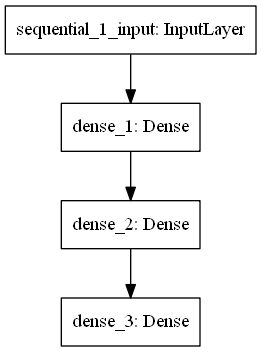

In [57]:
from keras.utils.vis_utils import plot_model
plot_model(ann, to_file='ann.png')

In [58]:
from ann_visualizer.visualize import ann_viz;
ann_viz(ann, title="Artificial Neural Network")

# Logistic Regression,Decision Tree,KNN Classifiers,AdaBostClassifiers,Naive Bayes Classifiers etc

In [59]:
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# All Features

In [60]:
#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test),"\n")


KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.42      0.76      0.54        17
           1       0.95      0.80      0.87        92

    accuracy                           0.80       109
   macro avg       0.68      0.78      0.71       109
weighted avg       0.87      0.80      0.82       109

Voting Ensemble:> 0.7981651376146789
              precision    recall  f1-score   support

           0       0.32      1.00      0.49        10
           1       1.00      0.79      0.88        99

    accuracy                           0.81       109
   macro avg       0.66      0.89      0.68       109
weighted avg       0.94      0.81      0.85       109

SVM:> 0.8073394495412844
              precision    recall  f1-score   support

           0       0.32      0.42      0.36        24
           1       0.82      0.75      0.79        85

    accuracy                           0.68       109
   macro avg       0.57      0.58      0.57       109
weighted avg

In [61]:
feature_col=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

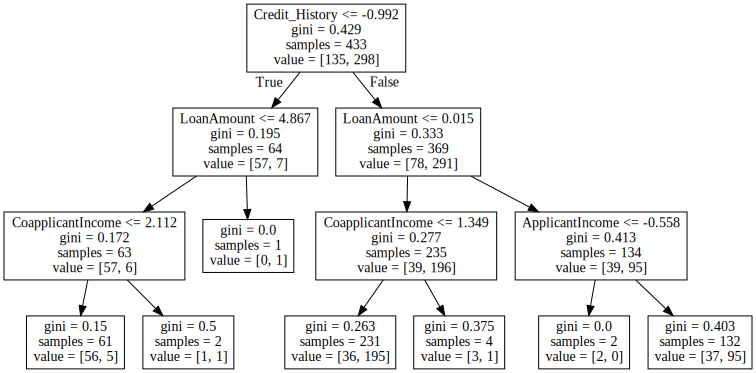

In [68]:
import graphviz 
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = feature_col)
graph = graphviz.Source(dot_data)
graph

# Selected Features

In [62]:
X = df_train.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)

y = df_train.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

542 542
After Standardization
Mean  9.625578932710716e-18 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.44      0.85      0.58        20
           1       0.97      0.81      0.88       116

    accuracy                           0.82       136
   macro avg       0.70      0.83      0.73       136
weighted avg       0.89      0.82      0.84       136

Voting Ensemble:> 0.8161764705882353
              precision    recall  f1-score   support

           0       0.31      1.00      0.47        12
           1       1.00      0.78      0.88       124

    accuracy                           0.80       136
   macro avg       0.65      0.89      0.67       136
weighted avg       0.94      0.80      0.84       136

SVM:> 0.8014705882352942
              precision    recall  f1-score   support

           0       0.33      0.45      0.38        29
           1       0.84      0.76      0.79       107

    accuracy                        

# Data Standardization / Normalization

In [66]:
from sklearn.utils import resample
new_data = df_train.copy()

#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Downsampled data:->
 1    192
0    166
Name: Loan_Status, dtype: int64
Upsampled data:->
 0    422
1    376
Name: Loan_Status, dtype: int64


# Down Sampled

In [67]:
X = df_downsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_downsampled.Loan_Status
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

After Standardization
Mean  2.8923042161198106e-17 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.68      0.55      0.61        49
           1       0.56      0.68      0.62        41

    accuracy                           0.61        90
   macro avg       0.62      0.62      0.61        90
weighted avg       0.62      0.61      0.61        90

Voting Ensemble:> 0.6111111111111112
              precision    recall  f1-score   support

           0       0.40      1.00      0.57        16
           1       1.00      0.68      0.81        74

    accuracy                           0.73        90
   macro avg       0.70      0.84      0.69        90
weighted avg       0.89      0.73      0.76        90

SVM:> 0.7333333333333333
              precision    recall  f1-score   support

           0       0.68      0.56      0.61        48
           1       0.58      0.69      0.63        42

    accuracy                           0.62

# Up Sampled

In [68]:
X = df_upsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_upsampled.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

798 798
After Standardization
Mean  -3.780631765217924e-18 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        92
           1       0.82      0.67      0.73       108

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200

Voting Ensemble:> 0.74
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        48
           1       1.00      0.58      0.73       152

    accuracy                           0.68       200
   macro avg       0.71      0.79      0.67       200
weighted avg       0.86      0.68      0.70       200

SVM:> 0.68
              precision    recall  f1-score   support

           0       0.57      0.77      0.66        83
           1       0.78      0.59      0.67       117

    accuracy                           0.67       200
   macro 

# MLP

In [69]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

In [70]:
print(predictions)

[0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1]


In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76       112
           1       0.68      0.74      0.71        88

    accuracy                           0.73       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.74      0.73      0.74       200



# Extra Tree Classifiers

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed = 7
kfold = KFold(n_splits = 10, random_state = seed)
num_trees = 150
max_features = 5
model = ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.8935917721518987


# K-Means Clustering

In [73]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(init='k-means++',n_clusters=2,n_init=10)
y_kmeans2 = kmeans2.fit_predict(X_test)
print(y_kmeans2)

kmeans2.cluster_centers_

[1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0]


array([[-0.6520075 , -1.00913203, -0.53131822,  0.11058483,  0.16824767,
         0.02683315, -0.2665154 , -0.13541276,  0.18512552, -0.01406574,
        -0.19820154],
       [ 0.46253524,  0.71587999,  0.37691806, -0.07844907, -0.11935519,
        -0.01903548,  0.18906648,  0.09606205, -0.13132836,  0.00997826,
         0.14060451]])

In [74]:
print(classification_report(y_test, y_kmeans2))

              precision    recall  f1-score   support

           0       0.66      0.49      0.56       112
           1       0.51      0.68      0.59        88

    accuracy                           0.57       200
   macro avg       0.59      0.59      0.57       200
weighted avg       0.60      0.57      0.57       200



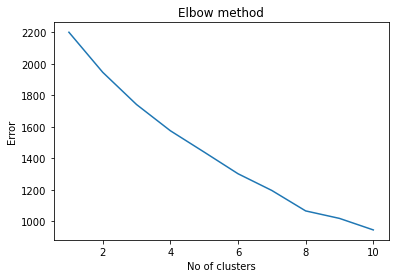

In [75]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X_test)
    kmeans.fit(X_test)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

# Ensemble Learning

In [76]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7068512658227848


In [77]:
from sklearn.ensemble import BaggingClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.8810759493670884


In [82]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")
kfold = model_selection.KFold(n_splits=10, random_state=seed)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.5514715189873418


# Hierarchical clustering

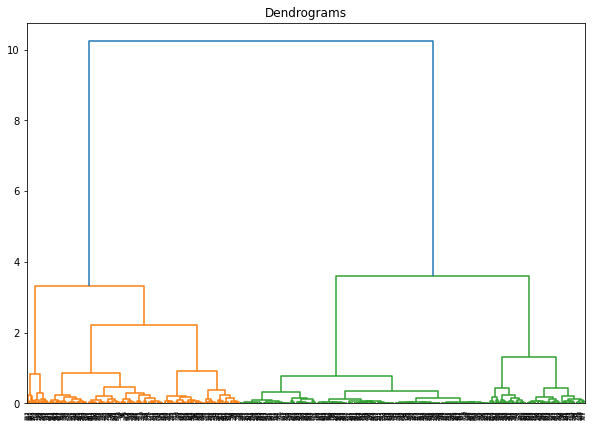

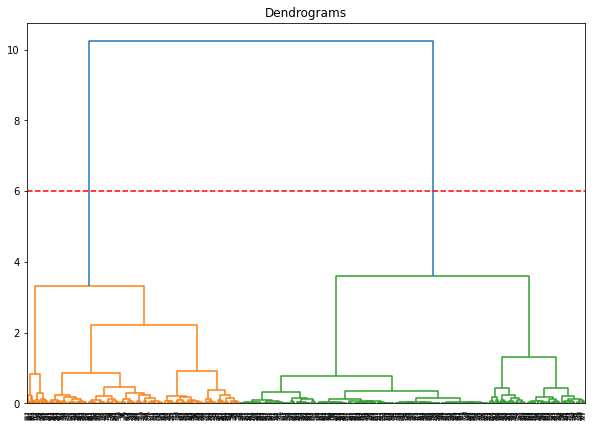

In [79]:
from sklearn.preprocessing import normalize
df_train = df_train.drop('Loan_ID', axis = 1) 
data_scaled = normalize(df_train)
data_scaled = pd.DataFrame(data_scaled, columns=df_train.columns)
data_scaled.head()
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [80]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hcloanpred=cluster.fit_predict(data_scaled)
print(hcloanpred)

[0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0
 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0
 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1
 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 1 1 1 0 1 

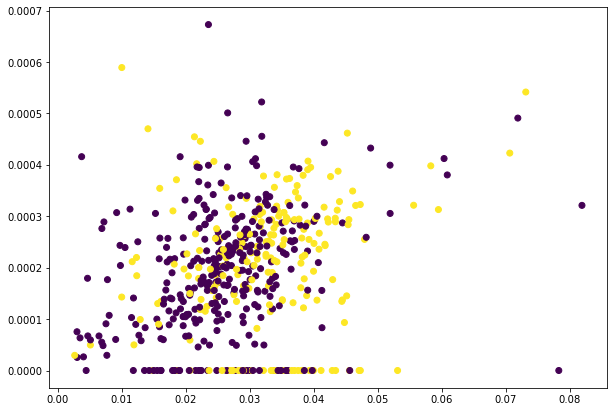

In [81]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['LoanAmount'], data_scaled['Credit_History'], c=cluster.labels_) 

# All Features Used Algorithms Accuracies(in %)

In [101]:
accu = {'ANN':81, 'MLP':80, 'LR':80,'K-NN':80,'SVM':81,'DecisionTree':81,'RandomForest':78,'AdaBoost':78,'GradientBoosting':78,'LinearDiscriminant':81,'NaiveBayes':81,'ExtraTree':89,'KMeans':69,'EadaBoost':76,'EDecisionTree':88,'ELogistic':79}
key = list(accu.keys())
values = list(accu.values())

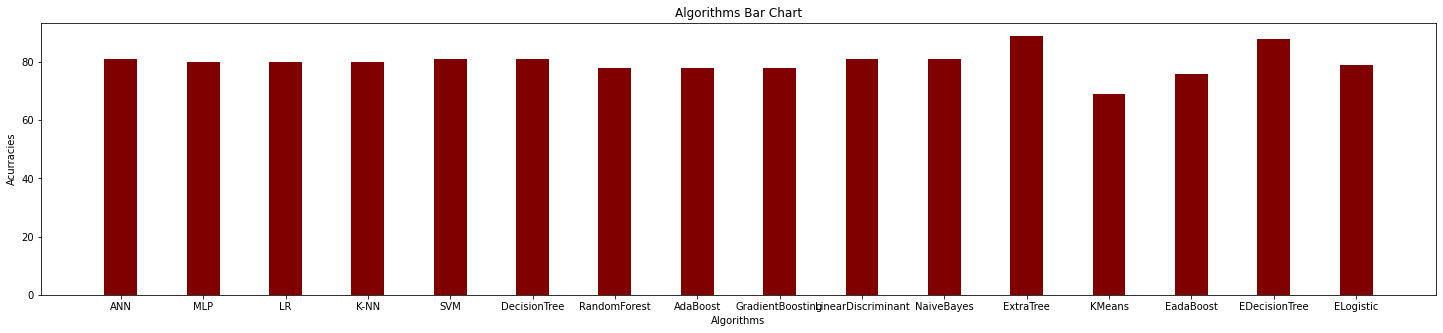

In [102]:
fig = plt.figure(figsize = (25, 5))
plt.bar(key, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Acurracies") 
plt.title("Algorithms Bar Chart") 
plt.savefig('Algorithms.png',dpi=1000)
plt.show() 

# Selected Features Algorithm Accuracies(in %)

In [103]:
ac = {'LR':80,'K-NN':80,'SVM':80,'DecisionTree':80,'XGBoost':69,'RandomForest':79,'AdaBoost':79,'GradientBoosting':80,'LinearDiscriminant':80,'NaiveBayes':79,'Voting Ensemble':82}
key1 = list(ac.keys())
values1 = list(ac.values())

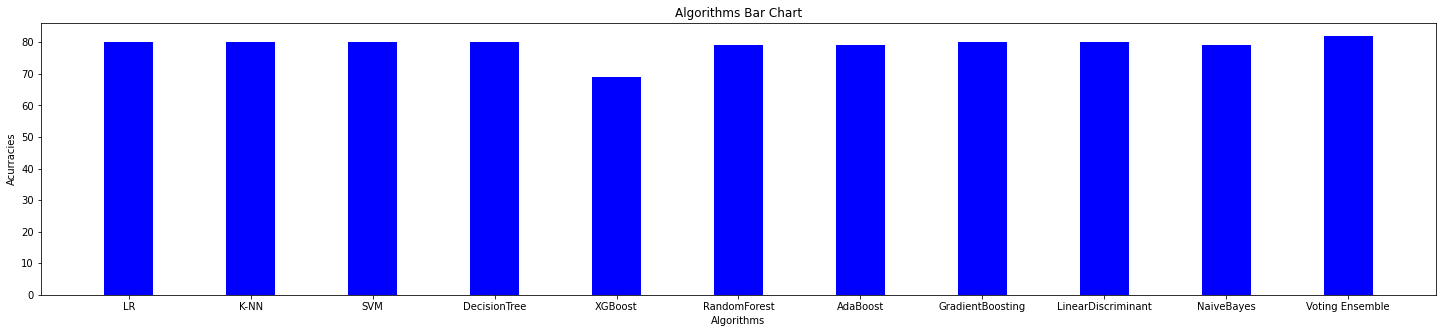

In [104]:
fig = plt.figure(figsize = (25, 5))
plt.bar(key1, values1, color ='Blue',  
        width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Acurracies") 
plt.title("Algorithms Bar Chart") 
plt.savefig('Selected Algorithms.png',dpi=1000)
plt.show() 

# Down Sampled Data Algorithms with Accuracies(in %)

In [105]:
ac1 = {'LR':70,'K-NN':68,'SVM':73,'DecisionTree':68,'XGBoost':62,'RandomForest':65,'AdaBoost':58,'GradientBoosting':62,'LinearDiscriminant':70,'NaiveBayes':68,'Voting Ensemble':61}
key2 = list(ac1.keys())
values2 = list(ac1.values())

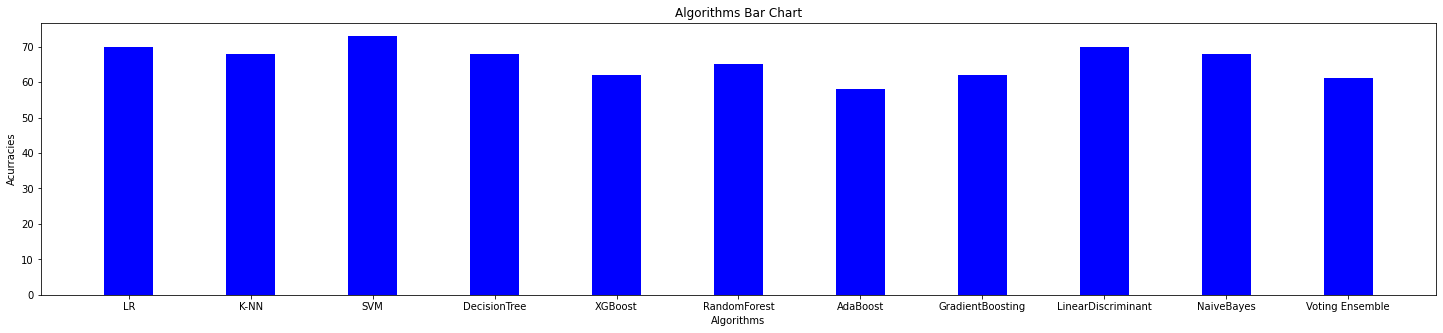

In [106]:
fig = plt.figure(figsize = (25, 5))
plt.bar(key2, values2, color ='Blue',  
        width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Acurracies") 
plt.title("Algorithms Bar Chart") 
plt.savefig('Down Sampled Algorithms.png',dpi=1000)
plt.show() 

# Up Sampled Data Algorithms with Accuracies(in %)

In [107]:
ac2 = {'LR':66,'K-NN':71,'SVM':68,'DecisionTree':66,'XGBoost':65,'RandomForest':84,'AdaBoost':66,'GradientBoosting':70,'LinearDiscriminant':67,'NaiveBayes':69,'Voting Ensemble':74}
key3 = list(ac2.keys())
values3 = list(ac2.values())

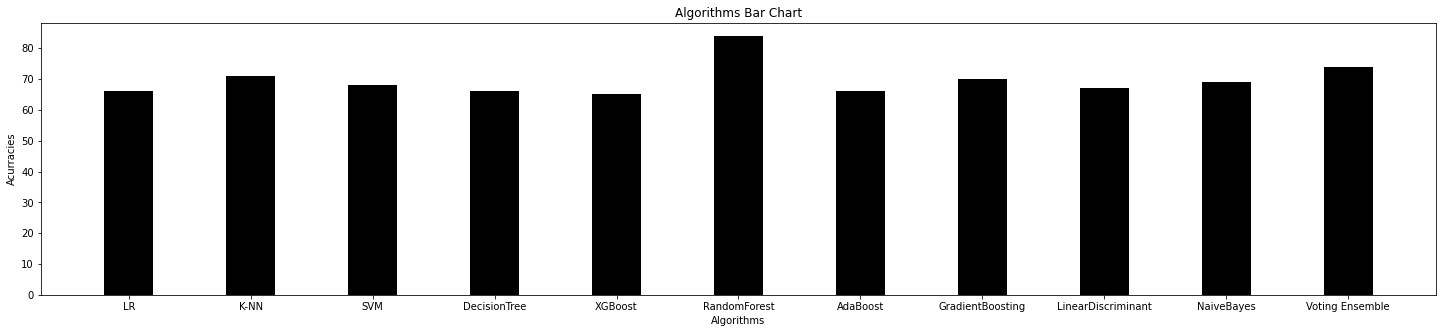

In [108]:
fig = plt.figure(figsize = (25, 5))
plt.bar(key3, values3, color ='Black',  
        width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Acurracies") 
plt.title("Algorithms Bar Chart") 
plt.savefig('Up Sampled Algorithms.png',dpi=1000)
plt.show() 

# Improved Algorithms Previous vs Improved(in %)

In [109]:
barWidth = 0.25
bars1 = [75, 65, 26, 79, 77, 70]
bars2 = [81, 81, 60, 81, 88, 81]

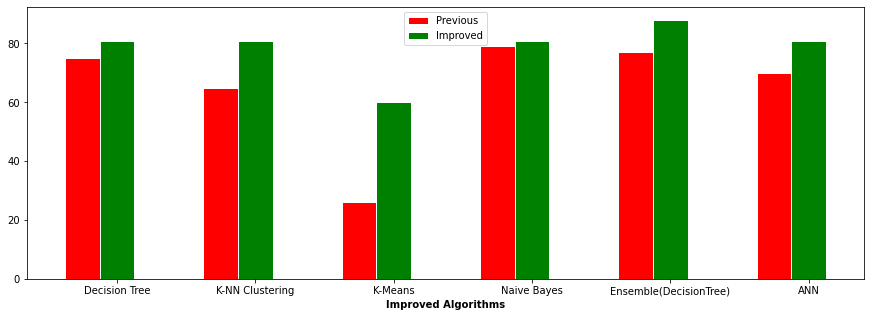

In [112]:
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
fig = plt.figure(figsize = (15, 5))
plt.bar(r1, bars1, color='Red', width=barWidth, edgecolor='white', label='Previous')
plt.bar(r2, bars2, color='Green', width=barWidth, edgecolor='white', label='Improved')

plt.xlabel('Improved Algorithms', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Decision Tree', 'K-NN Clustering', 'K-Means', 'Naive Bayes', 'Ensemble(DecisionTree)','ANN'])
 
plt.savefig('Improved Algorithms.png',dpi=1000)
plt.legend()
plt.show()

# All Algorithms With Accuracies(in %)

In [97]:
accuracies = {'ANN':81,'MLP':80,'ExtraTree':89,'KMeans':60,'EAdaboost':71,'EDecision':88,'ELogistic':55,'LR(All)':81,'K-NN(All)':81,'SVM(All)':81,'GradientBoosting(Selected)':80,'DecisionTree(All)':81,'XGBoost(Selected)':69,'RandomForest(Up Sampled)':84,'AdaBoost(Selected)':79,'LinearDiscriminant(All)':81,'NaiveBayes(All)':81,'Voting Ensemble(Selected)':82}
key4 = list(accuracies.keys())
values4 = list(accuracies.values())

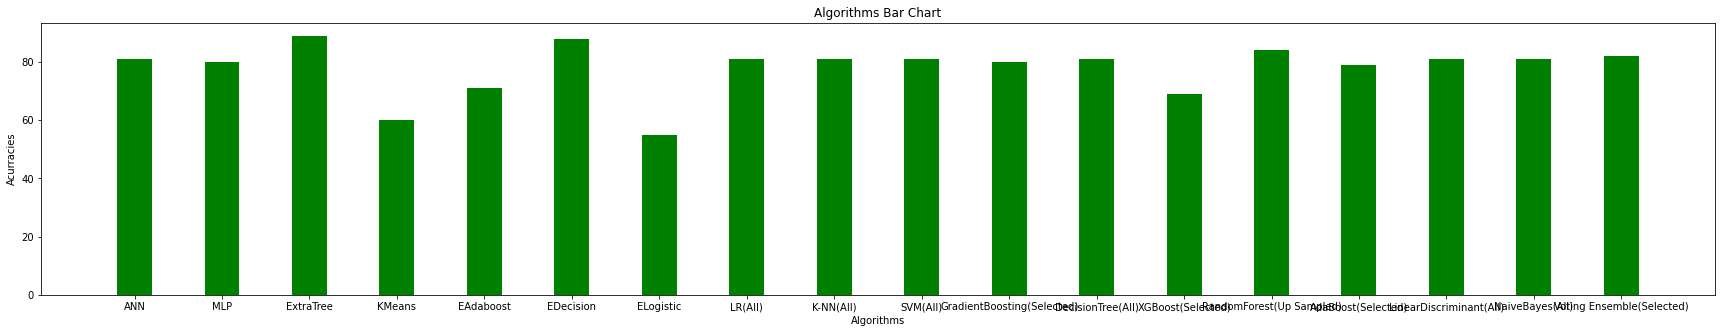

In [100]:
fig = plt.figure(figsize = (30, 5))
plt.bar(key4, values4, color ='Green',  
        width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Acurracies") 
plt.title("Algorithms Bar Chart") 
plt.savefig('All Algorithms.png',dpi=1000)
plt.show() 